<a href="https://colab.research.google.com/github/CamH53/DiabetesDatasetTool/blob/main/NumericalDescriptiveAnalysis(Hasan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Load what we will need for data wrangling, visualization, and modeling
from google.colab import drive
import numpy as np
import pandas as pd
import pickle
import csv

pd.options.display.max_rows = None
pd.options.display.max_columns = None

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# 1.1 . Add my Google Drive
drive.mount('/content/gdrive')

# 1.2 . Go to folder on Google Drive that contains files
%cd /content/gdrive/MyDrive/CDC2023/

# 1.3 . Special shell command to view the files in the home directory of the notebook environment
!ls



Mounted at /content/gdrive
/content/gdrive/MyDrive/CDC2023
 CAMSDESCRIPTIVE.ipynb			       diabetes_clean.csv
 CDC2023.gdoc				       HealthSciences_Dataset.csv
'CDC 2023 Slideshow .gslides'		      'Logistic Model.ipynb'
 CleanandWrangle.ipynb			       RF.ipynb
'DescriptiveAnalysis(Hasan - Numeric).ipynb'


In [ ]:
diabetes_df = pd.read_csv('diabetes_clean.csv')
diabetes_df['readmitted'].value_counts()
print(diabetes_df.columns)


Index(['Unnamed: 0', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'weight', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_num'],
      dtype='object')


**Numerical Data Visualizations**

This notebook is focused on looking at the cleaned data set before modeling with stratified analysis to see if obvious patterns or relationships emerge. While the focus is on Numerical visualizations, there are some categorical visualizations that seemed important to include in this notebook.

Firstly, to simplify the visualizations, the unknown/invalid values in the gender variable were removed.

In [ ]:
i = 0
index = i
for gen in diabetes_df['gender']:
  if gen == 'Unknown/Invalid':
    index = i
  else:
    i+=1

print(diabetes_df['gender'][index])

diabetes_df['gender'] = diabetes_df['gender'].drop(index)



Unknown/Invalid


In general, it seems that there is an almost even distribution of men and women, but females tend to have a higher chance of early readmittance.

Female    28023
Male      23793
Name: gender, dtype: int64


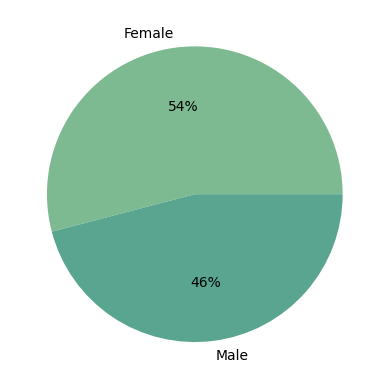

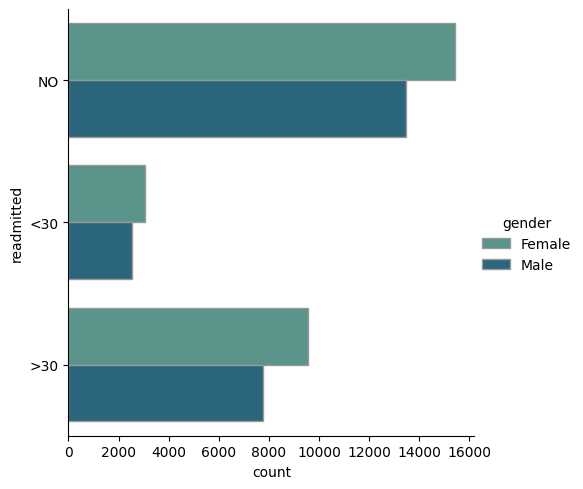

In [ ]:
#Gender stratified by Readmittance
print(diabetes_df['gender'].value_counts())

keys = ['Female', 'Male']
data = [28023, 23793]

palette_color = sns.color_palette('crest')
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

sns.catplot(
    data=diabetes_df, y="readmitted", hue="gender", kind="count",
    palette="crest", edgecolor=".6",
)


While caucasian patients are the obvious majority in the dataset, making statements about caucasian patients relative to other patients are hard since it is expected for them to have higher values in each subcategory.


 However, since asians, hispanics, and others are in similar proportions relative to the total, they were analyzed separately. This showed that in general, hispanics have a generally higher amount of early readmittance.

Caucasian          37333
AfricanAmerican    10942
Hispanic            1163
Other                839
Asian                450
Name: race, dtype: int64


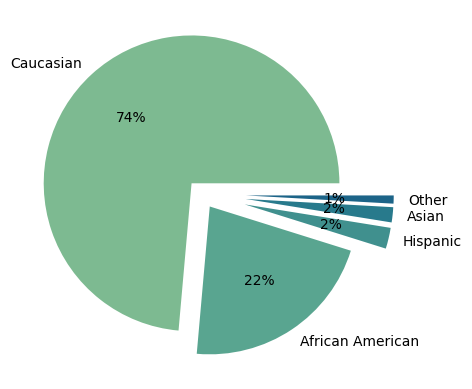

ValueError: ignored

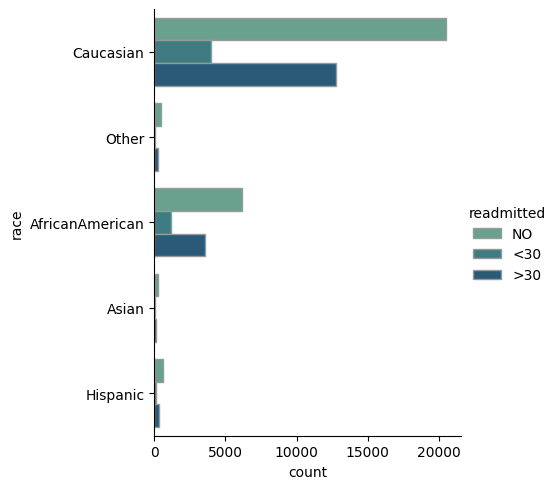

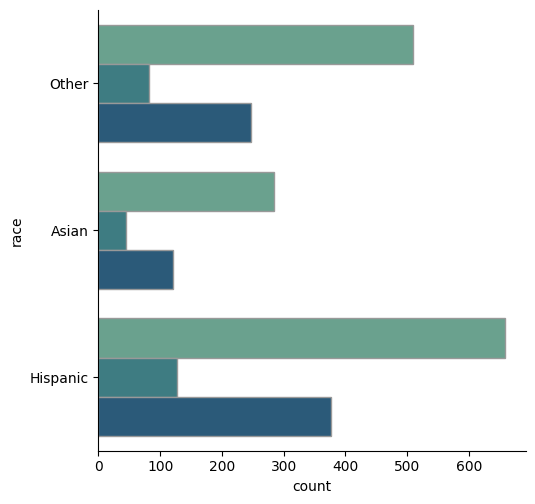

In [ ]:
print(diabetes_df['race'].value_counts())

keys = ['Caucasian', 'African American', 'Hispanic', 'Asian', 'Other']
data = [37333, 10942, 1163, 839, 450]

palette_color = sns.color_palette('crest')
plt.pie(data, labels=keys, colors=palette_color,
        explode=[.1, .1, .3, .3, .3], autopct='%.0f%%')
plt.show()


#Race Stratified by readmission

sns.catplot(
    data=diabetes_df, y="race", hue="readmitted", kind="count",
    palette="crest", edgecolor=".6",
)

# Define Asian, Mexican, and Other:

age_refined = diabetes_df.loc[diabetes_df['race'].isin(['Asian', 'Other', 'Hispanic'])]

sns.catplot(
    data=diabetes_df, y=age_refined['race'], hue=age_refined['readmitted'], kind="count",
    palette="crest", edgecolor=".6",
)

While age is treated as a numeric for the sake of the model, a simple stratified analysis of the original categorical variable was completed to look for interesting patterns. It does seem that as age increases the chances of early readmittance increase but this could also be because the patients tend to be older.

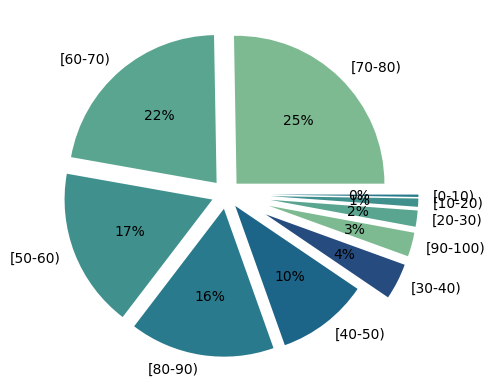

<Figure size 1500x600 with 0 Axes>

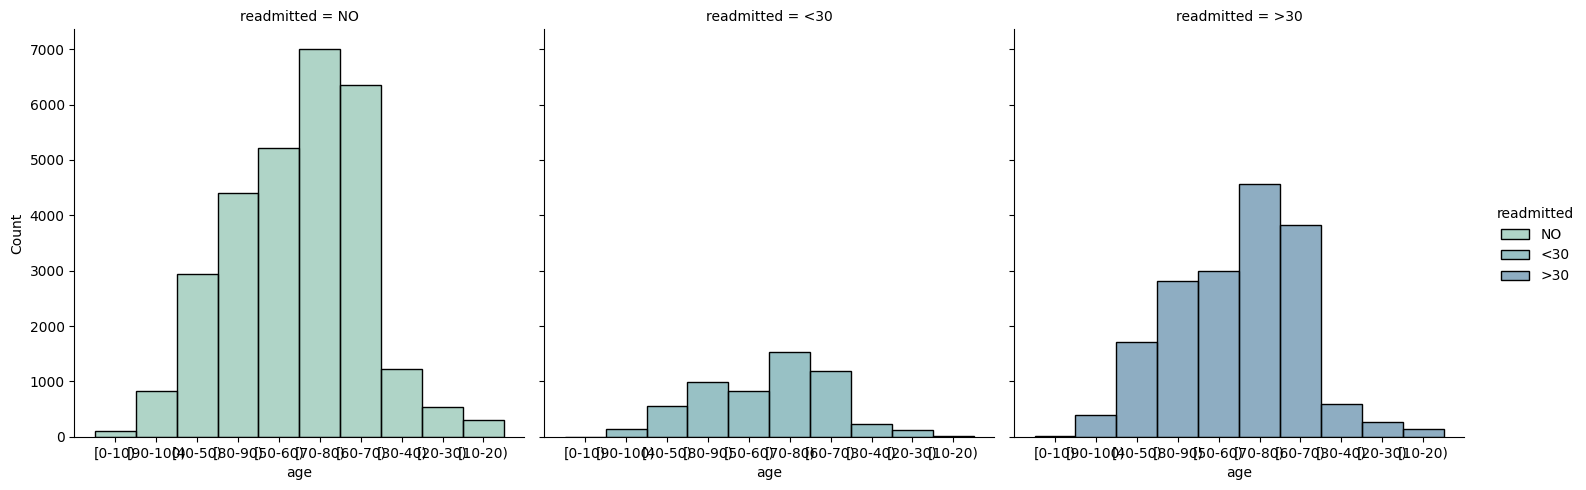

In [ ]:
dict_age = dict(diabetes_df['age'].value_counts())

plt.pie(dict_age.values(), labels=dict_age.keys(), colors=palette_color, autopct='%.0f%%', explode = [0.1, 0.1, 0.1, 0.1 , 0.1 , 0.3, 0.3, 0.3, 0.3, 0.3])
plt.show()

# Age Stratified Analysis
plt.figure(figsize=(15, 6))
sns.displot(diabetes_df, x="age", col = 'readmitted', palette = 'crest', hue = 'readmitted')

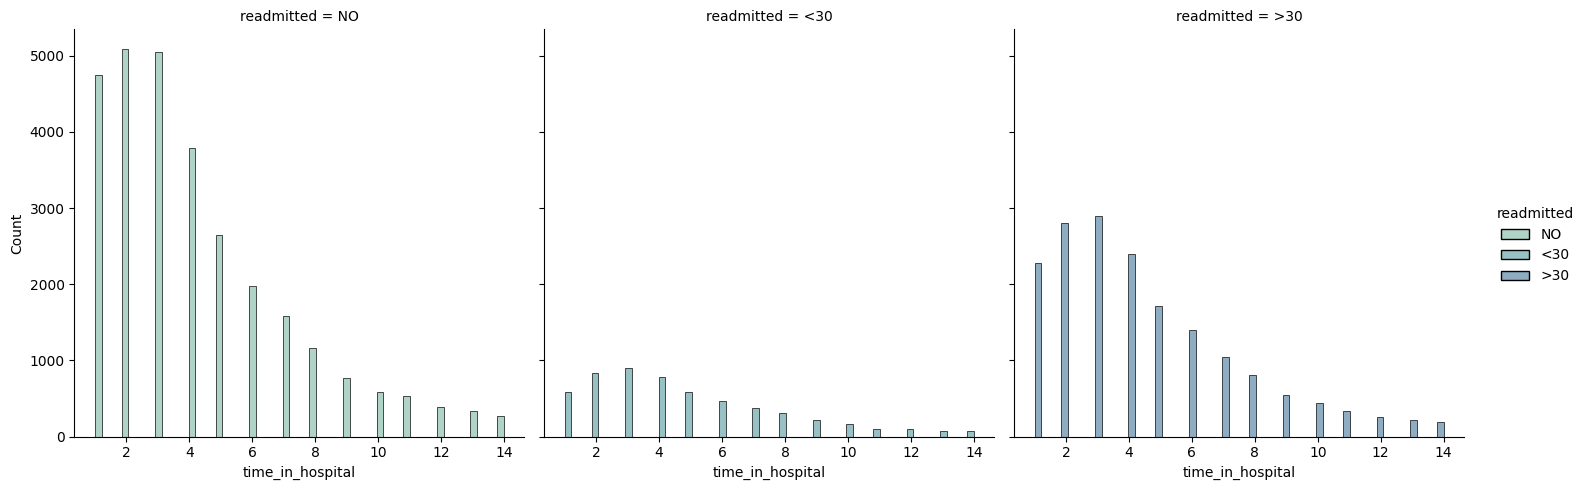

In [ ]:
# Time in Hospital Stratified Analysis

sns.displot(diabetes_df, x="time_in_hospital", col = 'readmitted', palette = 'crest', hue = 'readmitted')




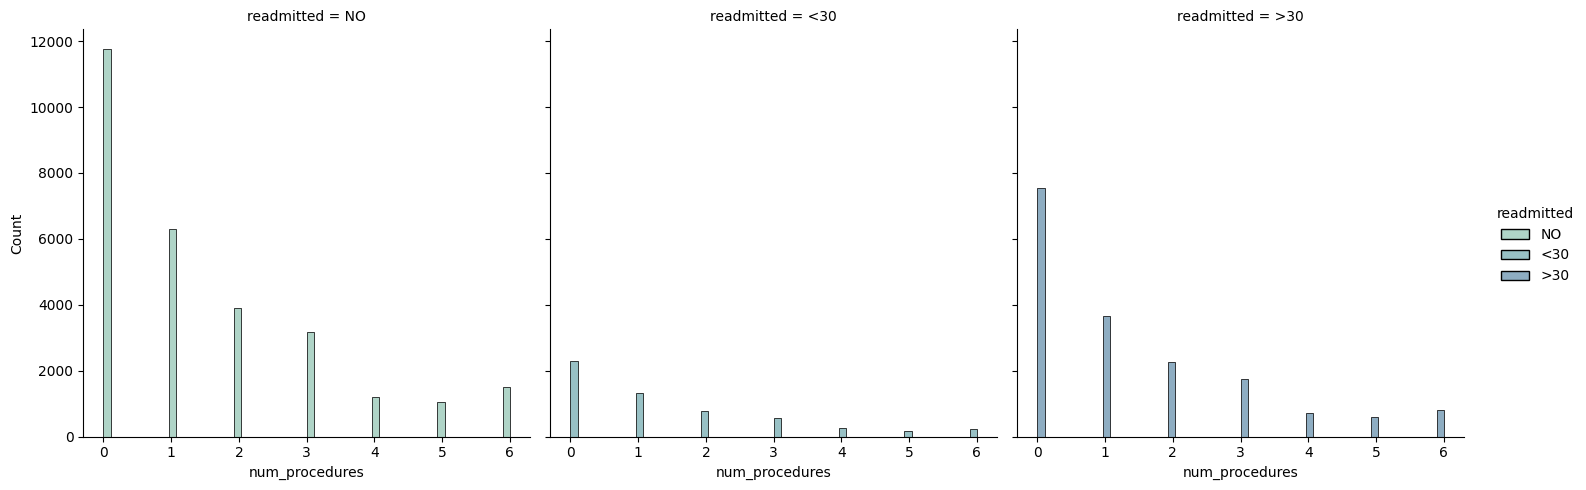

In [ ]:
#Number of Lab Procedures Performed During Encounter Analysis

sns.displot(diabetes_df, x="num_procedures", col = 'readmitted', palette = 'crest', hue = 'readmitted')


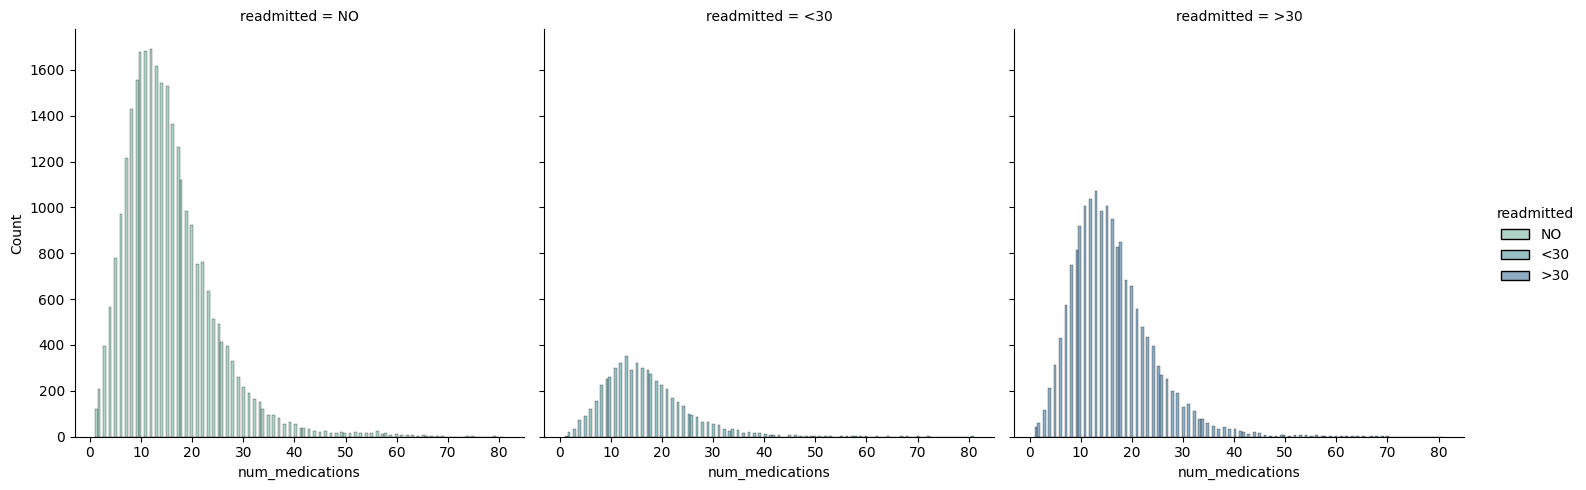

In [ ]:
sns.displot(diabetes_df, x="num_medications", col = 'readmitted', palette = 'crest', hue = 'readmitted')


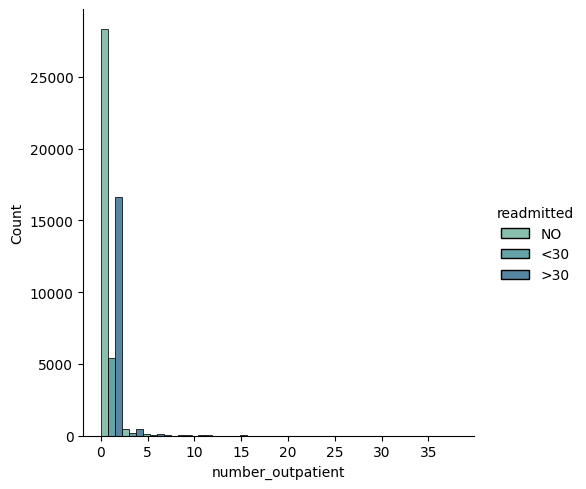

In [ ]:
sns.displot(diabetes_df, x="number_outpatient",multiple = 'dodge' , palette = 'crest', hue = 'readmitted')


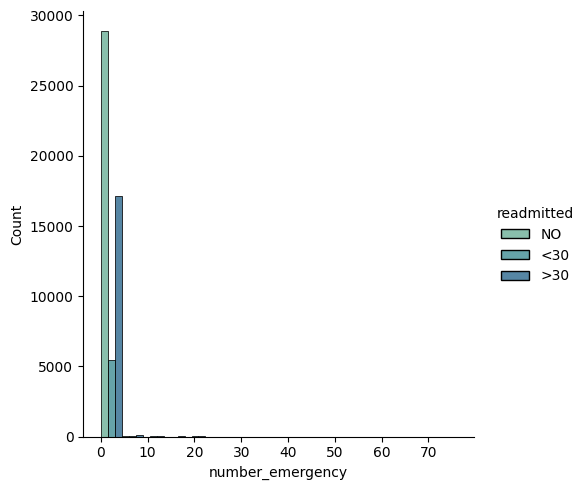

In [ ]:
sns.displot(diabetes_df, x="number_emergency",multiple = 'dodge' , palette = 'crest', hue = 'readmitted')


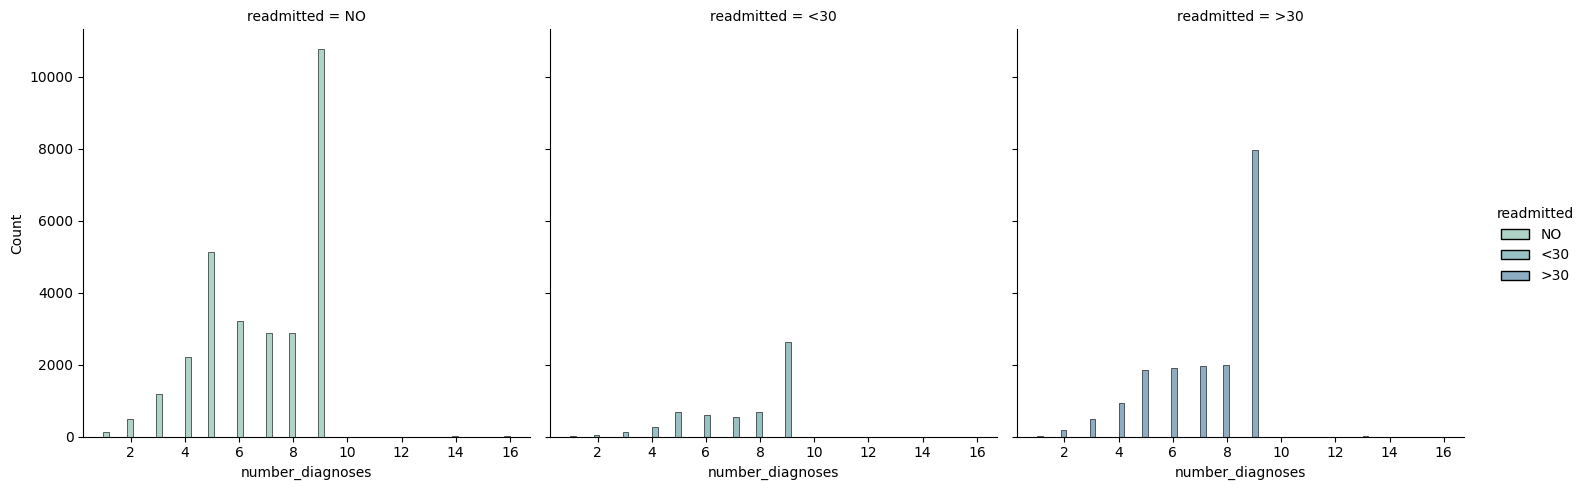

In [ ]:
sns.displot(diabetes_df, x="number_diagnoses", col = 'readmitted' , palette = 'crest', hue = 'readmitted')
